In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(color_codes=True)
import warnings
warnings.filterwarnings("ignore")
import pandas_profiling

In [3]:
cgf = pd.read_csv("CardioGoodFitness.csv",index_col=0)

# <span style="font-family: Calibri; font-size:1.5em;color:#000055"> Running the Data </span>
_Cardio Good Fitness customer profiles and business recommendations_
***

This report analyzes customer data for three treadmill products used at the retail store Cardio Good Fitness, TM798, TM195, and TM498. The goal of this report is to present profiles for common current customers for each treadmill as well as highlight what sorts of customers are currently avoiding the purchase of treadmills. A detailed exploratory univariate and multivariate analysis for the data in general and the treadmill products in general is followed by conclusions and recommendations.

I attempt to answer the following questions:

What is the typical user of each type of treadmill?
What kind of users don't buy treadmills?
What can be done to increase sales?



## Table of Contents

1. [The Data](#The-Data)
2. [Analysis of the Variables for All Customers](#Analysisofvariables)
    3. [Overview](#Overview)
    4.[Effect of Qualitative Categories on the Data](#ovqualcat)
        5. [Gender](#ovgender)
        6. [Marital Status](#ovmarital)
7. [TM195](#TM195)
    8. [Descriptive statistics and distributions for TM195](#TM195desc)
    9. [Correlations between variables for TM195](#TM195corr)
    10. [Gender and TM195](#TM195gender)
    11. [Marital Status and TM195](#TM195marital)
12. [TM498](#TM498)
    13. [Descriptive statistics and distributions for TM498](#TM498desc)
    14. [Correlations between variables for TM498](#TM498corr)
    15. [Gender and TM498](#TM498gender)
    16. [Marital Status and TM498](#TM498marital)
17. [TM798](#TM798)
    18. [Descriptive statistics and distributions for TM798](#TM798desc)
        19. [Education and TM798](#TM798edu)
        20. [Income and TM798](#TM798income)
        21. [Fitness and TM798](#TM798Fitness)
    22.[Correlations between variables for TM798](#TM798corr)
    23. [Gender and TM798](#TM798Gender)
    24. [Marital Status and TM798](#TM798marital)
25. [Product Comparisons](#prodcom)
    26. [Customer profiles for TM195 and TM498](#2TMprofiles)
    27. [Customer Profile for TM798](#TM798prof)
28. [Conclusion and Recommendations](#concres)
    29. [Untapped markets](#untapped)
    30. [Recommendations](#recomm)
        31. [Product-related recommendations](#prodrecs)
        32. [Survey-related recommendations](#surveyrec)

## <span style="font-family: Calibri; font-size:1.5em;color:#000055"> The Data </span><a name=The-Data></a>

In [3]:
#Assess the number of entries and columns (rows, columns)
cgf.shape

(180, 8)

In [4]:
#Nine variables were listed, but there are only 8 columns. This is strange, so I pull up a picture of the data.
cgf.head(5)

,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
Product,,,,,,,,
TM195,18,Male,14,Single,3,4,29562,112
TM195,19,Male,15,Single,2,3,31836,75
TM195,19,Female,14,Partnered,4,3,30699,66
TM195,19,Male,12,Single,3,3,32973,85
TM195,20,Male,13,Partnered,4,2,35247,47


I can see there are 180 unique entries in the dataset. However, Products is the index, which will make further 
analysis awkward. Thus, I first make Product its own column.

In [5]:
#Make products its own column by adding in a new numbered index.
cgf = cgf.reset_index()

I want to know how many unique customers there are. One customer could buy multiple treadmills. 
To assess this, I first drop Product and check how many unique entries there are.
Because we do not have unique identifiers for customers, if we have duplicates it is theoretically possible for two 
different customers to have exactly the same entries on all columns. 
However, given the nature of the variables and our small dataset I think it unlikely enough that I will assume it does not occur even if we do have duplicates.

In [6]:
#dropping product to check for unique customers who may use multiple treadmills
cgf_customers = cgf.drop("Product", axis=1) 

#Checking for duplicate rows by comparing the lengths after duplicates are dropped.
len(cgf_customers)-len(cgf_customers.drop_duplicates())

0

The lengths of the datasets are identical even after dropping duplicates, meaning that there are no duplicates. From the above we can conclude that there are 180 unique customers.

Next we want to test whether the data has any missing values among its 180 entries.

In [7]:
#check for non-null entries. All should be equal.
cgf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB


Each column has 180 non-null values, meaning there are no missing values.
We can also see that we have 6 integer and 3 object data types.

Next, how many different treadmill products are present in the database is relevant, as each type of treadmill may attract a different sort of customer.

In [8]:
#The value_counts() method will isolate how many different kinds of treadmills there are
# and give us an entry count.
cgf["Product"].value_counts()

TM195    80
TM498    60
TM798    40
Name: Product, dtype: int64

We can see that there are three types of treadmill, TM195, TM498, and TM798, each with 80, 60, and 40 entries, respectively.
Given that we will want to create customer profiles for each treadmill, I will create different dataframes for each treadmill for separate analysis later.

In [9]:
#I split the database by treadmill
df195 = cgf[cgf["Product"]=="TM195"]
df498 = cgf[cgf["Product"]=="TM498"]
df798 = cgf[cgf["Product"]=="TM798"]

#Double check the shape and type of each new variable.
print(df195.shape)
print(type(df195))
print(" ")
print(df498.shape)
print(type(df498))
print(" ")
print(df798.shape)
print(type(df798))

(80, 9)
<class 'pandas.core.frame.DataFrame'>
 
(60, 9)
<class 'pandas.core.frame.DataFrame'>
 
(40, 9)
<class 'pandas.core.frame.DataFrame'>


The new dataframes match the value counts for each, showing a successful split.

We also want to split the data by gender for our analysis below.

In [10]:
#Split the data by gender
cgf_men = cgf[cgf["Gender"]=="Male"]
cgf_women = cgf[cgf["Gender"]=="Female"]

#double check data shape
print(cgf_men.shape)
print(type(cgf_men))
print(" ")
print(cgf_women.shape)
print(type(cgf_women))

(104, 9)
<class 'pandas.core.frame.DataFrame'>
 
(76, 9)
<class 'pandas.core.frame.DataFrame'>


The total of entries equals 180, the original number, and there are 9 columns, equal to the original dataframe. This means there was a successful split.


## <span style="font-family: Calibri; font-size:1.5em;color:#000055"> Analysis of the Variables for All Customers </span><a name=Analysisofvariables></a>
***

During the following analysis, in general I will only comment on pieces of data that are strange, or differentiate products from one another. If distributions are largely normal, then there is little to say beyond repeating what can be clearly seen in the displayed figures and tables.

### <span style="font-family: Calibri; font-size:1.5em;color:#000055"> Overview </span><a name=Overview></a>

In [11]:
#Generate descriptive statistics for each variable for the data overall.
cgf.describe().round(2)

,Age,Education,Usage,Fitness,Income,Miles
count,180.00,180.00,180.00,180.00,180.00,180.00
mean,28.79,15.57,3.46,3.31,53719.58,103.19
std,6.94,1.62,1.08,0.96,16506.68,51.86
min,18.00,12.00,2.00,1.00,29562.00,21.00
25%,24.00,14.00,3.00,3.00,44058.75,66.00
50%,26.00,16.00,3.00,3.00,50596.50,94.00
75%,33.00,16.00,4.00,4.00,58668.00,114.75
max,50.00,21.00,7.00,5.00,104581.00,360.00


In [12]:
#Checking for how skewed the data is.
#First, remove qualitative data
numcol = cgf.select_dtypes(exclude=["object"]).columns
print(numcol)
#Now check skewness of the quantitative data
for i in numcol:
    print("Column: ",i," has skewness ",cgf[i].skew()) #close to 0 is low skewness.

Index(['Age', 'Education', 'Usage', 'Fitness', 'Income', 'Miles'], dtype='object')
Column:  Age  has skewness  0.9821608255301499
Column:  Education  has skewness  0.6222941428985225
Column:  Usage  has skewness  0.7394944961814618
Column:  Fitness  has skewness  0.45479999572809515
Column:  Income  has skewness  1.2917845606896028
Column:  Miles  has skewness  1.7244965928707188


If skewness of values <-1 or >1 can be considered skewed, only Income and Miles are positively skewed, and those not extremely-so. There are no variables with negative skew.

In [5]:
#Pandas profile will describe the data concisely and highlight areas warranting additional investigation
pandas_profiling.ProfileReport(cgf)

Summarize dataset:   0%|          | 0/22 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Pandas Profile showed correlations but didn't give us numbers, so I want to know more about these correlations.

<AxesSubplot:>

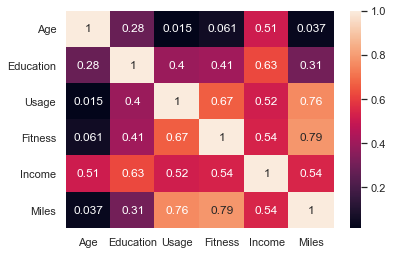

In [14]:
#linear correlation matrix for the data
sns.heatmap(cgf.corr(), annot=True)

Miles, Fitness, and Usage are so highly correlated they are practically interchangable. The lone exception may be Usage and Fitness. They are strongly correlated but I'd prefer something that rounds to .8 or so before equating them in my analysis.

However, Fitness is qualitatively different from Usage and Miles because it describes the current state of the customer whereas Miles and Usage describe their future fitness plans. Therefore, in the below analyses I will group Usage and Miles together, but not Fitness.

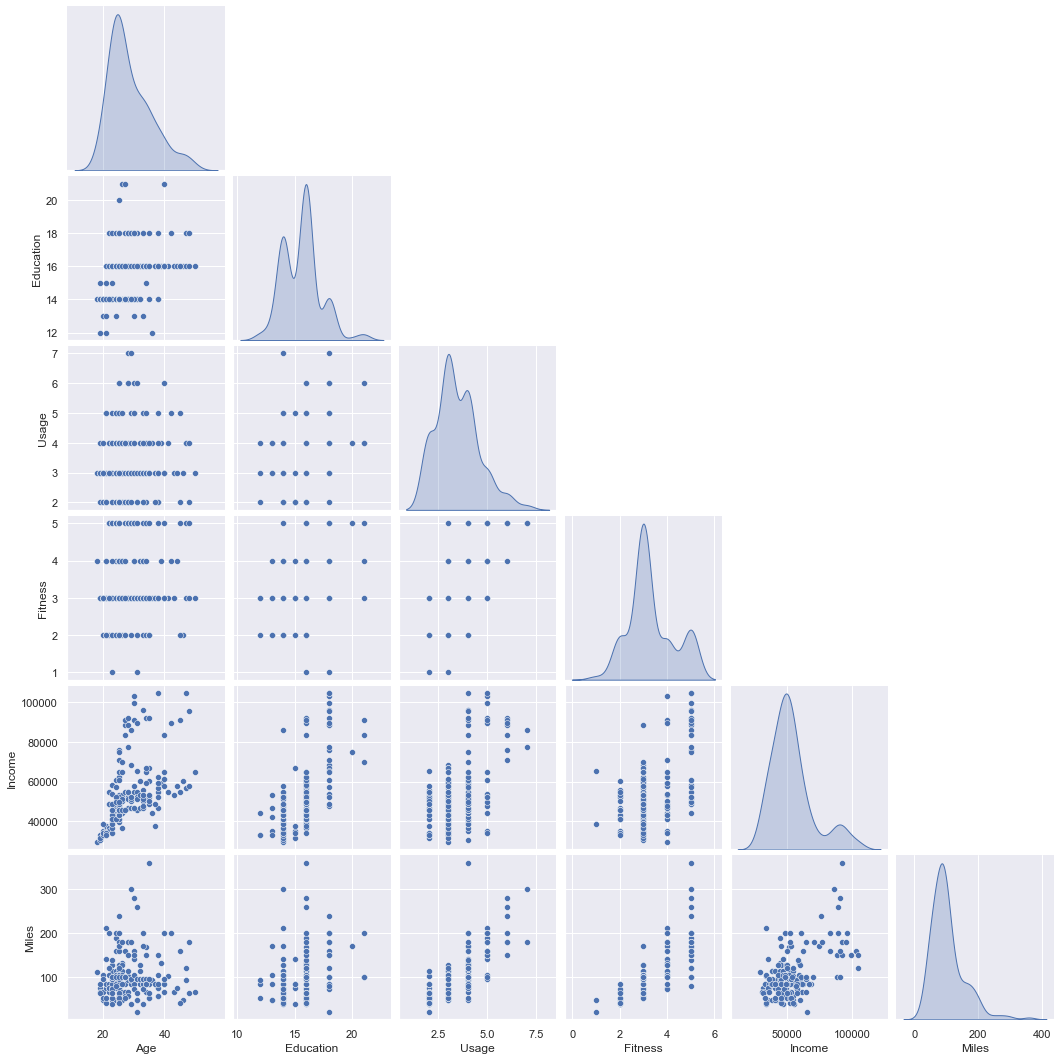

In [15]:
#Making a pairplot for increased readability over Pandas Profile
sns.pairplot(cgf,corner=True,diag_kind='kde')

This gives us a good assessment on the overall distribution of the data and their interactions.

The bumps in the Education distribution are associates degree, bachelor's degree, and Master's degree, respectively.



### <span style="font-family: Calibri; font-size:1.5em;color:#000055"> Effect of qualitative categories on the data </span><a name=ovqualcat></a>
***
Because Marital Status and Gender are not integers, their impact is masked in the above analysis.
To see how gender and marital status affect distributions, I must look at them independently.

I want to first examine how gender and marital status affect the use of the treadmills. I chose Miles as my representative of treadmill use because it is a more fine-grained measurement of use than the Usage variable, and they are so highly correlated it doesn't really matter which one is in the y axis for general observation.

#### <span style="font-family: Calibri; font-size:1.5em;color:#000055"> Gender </span><a name=ovgender></a>
***
Let's first get a general look at the differences between men and women across the various quantitative variables.

In [16]:
#describing women overall
cgf_women.describe().round(2)

,Age,Education,Usage,Fitness,Income,Miles
count,76.00,76.00,76.00,76.00,76.00,76.00
mean,28.57,15.39,3.18,3.03,49828.91,90.01
std,6.34,1.44,1.02,0.83,12557.69,44.78
min,19.00,13.00,2.00,1.00,30699.00,21.00
25%,24.00,14.00,2.00,3.00,42921.75,66.00
50%,26.50,16.00,3.00,3.00,47754.00,85.00
75%,33.00,16.00,4.00,3.00,53796.00,100.00
max,50.00,21.00,6.00,5.00,95866.00,280.00


In [17]:
#describing men overall
cgf_men.describe().round(2)

,Age,Education,Usage,Fitness,Income,Miles
count,104.00,104.00,104.00,104.00,104.00,104.00
mean,28.95,15.70,3.65,3.52,56562.76,112.83
std,7.38,1.73,1.10,0.99,18421.69,54.70
min,18.00,12.00,2.00,1.00,29562.00,42.00
25%,23.75,14.00,3.00,3.00,45480.00,85.00
50%,26.00,16.00,4.00,3.00,52302.00,100.00
75%,34.00,16.00,4.00,4.00,61611.25,141.00
max,48.00,21.00,7.00,5.00,104581.00,360.00


Men and women tend to be about the same age and education. Women tend to make a little less money, but not a great deal less. Men tend to be a little more fit, but not a great deal more fit. This probably explains why men tend to use their treadmill a little bit more.

Text(0.5, 1.0, 'Fitness for Women Across Products')

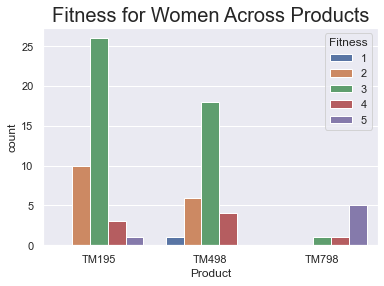

In [18]:
#Check out how women are distributed across the three products.
sns.countplot(cgf_women["Product"],hue=cgf_women["Fitness"])
plt.title("Fitness for Women Across Products", fontsize=20)

Text(0.5, 1.0, 'Fitness for Men Across Products')

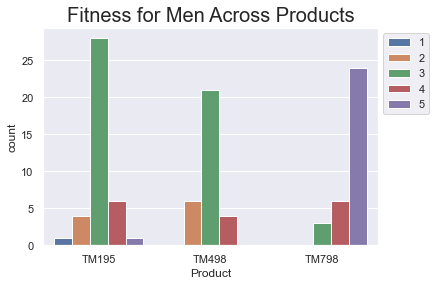

In [19]:
#Check out how men are distributed across the three products.
sns.countplot(cgf_men["Product"],hue=cgf_men["Fitness"])
plt.legend(bbox_to_anchor=(1,1)); #Location of legend moved to side
plt.title("Fitness for Men Across Products", fontsize=20)

The proportion of men and women who like TM195 and TM498 are about the same, but there is a huge difference when it comes to TM798. We will investigate this more in the [TM798 section](#TM798) and the [Product Comparison](#prodcom) section.

#### <span style="font-family: Calibri; font-size:1.5em;color:#000055"> Martial Status </span><a name=ovmarital></a>
***

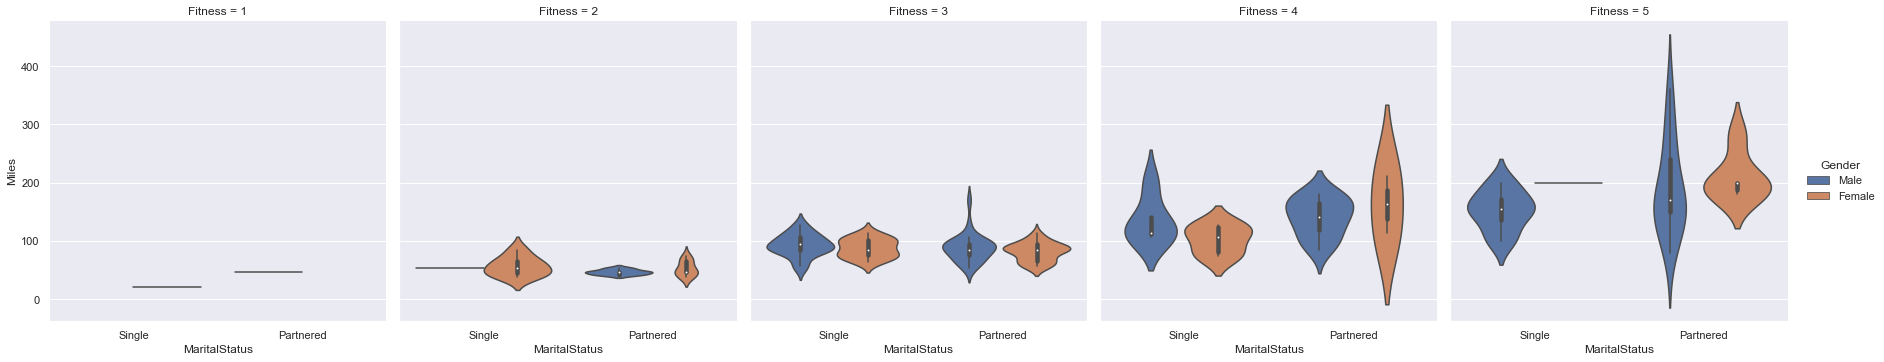

In [20]:
#Make a catplot to see how marital status and gender is distributed across Fitness & Miles
sns.catplot(x="MaritalStatus",
           y="Miles",
           hue="Gender",
           col="Fitness",
           data=cgf,
           kind="violin");

Several things can be observed. First, there seem to be a dearth of low-fitness men and women. Second, almost all fitness 5 women seem to be married.

This is an interesting finding and warrants a closer look.

In [21]:
#separate out all instances of single women with fitness >=4
fitsinglelady = cgf.loc[(cgf.Gender.values == "Female") & (cgf.Fitness.values>=4) &
                        (cgf.MaritalStatus.values == "Single")]
fitsinglelady.shape

(7, 9)

7 entries for 9 columns is very small. I'll just display the whole table.

In [22]:
fitsinglelady

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
57,TM195,32,Female,14,Single,3,4,46617,113
76,TM195,44,Female,16,Single,3,4,57987,75
98,TM498,25,Female,14,Single,3,4,43206,127
109,TM498,26,Female,16,Single,4,4,50028,127
124,TM498,33,Female,18,Single,3,4,47754,74
144,TM798,23,Female,18,Single,5,4,53536,100
148,TM798,24,Female,16,Single,5,5,52291,200


In [23]:
#separate out all instances of married women with fitness >=4
fitmarriedlady = cgf.loc[(cgf.Gender.values == "Female") & (cgf.Fitness.values>=4) &
                         (cgf.MaritalStatus.values == "Partnered")]
fitmarriedlady.shape

(7, 9)

7 entries for 9 columns is very small. I'll just display the whole table again.

In [24]:
fitmarriedlady

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
23,TM195,24,Female,16,Partnered,5,5,44343,188
34,TM195,26,Female,14,Partnered,3,4,44343,113
84,TM498,21,Female,14,Partnered,5,4,34110,212
152,TM798,25,Female,18,Partnered,5,5,61006,200
162,TM798,28,Female,18,Partnered,6,5,92131,180
167,TM798,30,Female,16,Partnered,6,5,90886,280
171,TM798,33,Female,18,Partnered,4,5,95866,200


In [25]:
#get a count for fit single ladies
fitsinglelady.groupby(by=["Fitness"]).size().reset_index(name='count')

,Fitness,count
0,4,6
1,5,1


In [26]:
# Get the mean for the fit single ladies across categories
fitsinglelady.groupby(by=["Fitness"]).mean()

,Age,Education,Usage,Income,Miles
Fitness,,,,,
4,30.5,16.0,3.5,49854.666667,102.666667
5,24.0,16.0,5.0,52291.000000,200.000000


Fitness 4 single women intend to run _many_ fewer miles than their fitness 5 counterparts. Although it appears that Fitness 4 single women tend to be older than their fitness 5 counterparts, remember that the samples are tiny. The single 44 year old customer may be influencing the mean. I'll bring up the median to double check this distribution:

In [27]:
# Getting the median for fit single ladies
fitsinglelady.groupby(by=["Fitness"]).median()

,Age,Education,Usage,Income,Miles
Fitness,,,,,
4,29.0,16.0,3.0,48891.0,106.5
5,24.0,16.0,5.0,52291.0,200.0


They still seem to be somewhat older overall, despite having about the same income. The medians of the other categories are also largely the same as their means.

In [28]:
#get a count for fit married ladies
fitmarriedlady.groupby(by=["Fitness"]).size().reset_index(name='count')

,Fitness,count
0,4,2
1,5,5


In [29]:
# Get the mean for the fit married ladies across variables
round(fitmarriedlady.groupby(by=["Fitness"]).mean(),1)

,Age,Education,Usage,Income,Miles
Fitness,,,,,
4,23.5,14.0,4.0,39226.5,162.5
5,28.0,17.2,5.2,76846.4,209.6


Although the samples are far too small for proper inference, we can at least say definitively that the women who report themselves as being in top form (5 in fitness) who buy a treadmill from the store are overwhelmingly partnered. Only 1 single woman claimed to be Fitness 5, compared to 5 married women who did the same. Whether this is because they are actually more fit or just they view themselves as more fit is a different question.

Let's do the same analysis for the men.

In [30]:
#separate out all instances of single men with fitness >=4
fitsingledude = cgf.loc[(cgf.Gender.values == "Male") & (cgf.Fitness.values>=4) & 
                        (cgf.MaritalStatus.values == "Single")]
fitsingledude.groupby(by=["Fitness"]).size()

Fitness
4     5
5    12
dtype: int64

In [31]:
#Get the mean for fit single dudes across variables
round(fitsingledude.groupby(by=["Fitness"]).mean(),1)

,Age,Education,Usage,Income,Miles
Fitness,,,,,
4,26.0,15.4,3.8,48854.6,134.4
5,29.0,16.9,4.6,64958.3,152.4


Wait a minute. How come the single men have an 18 Mile difference in mean between fit 4 and 5 when the single ladies were rocking a 98 Mile difference?

Maybe men judge their fitness on resistance training rather than cardiovascular health? If so, then married men should show the same phenomenon.

In [32]:
#separate out all instances of married men with fitness >=4
fitmarrieddude = cgf.loc[(cgf.Gender.values == "Male") & (cgf.Fitness.values>=4) &
                         (cgf.MaritalStatus.values == "Partnered")]
fitmarrieddude.groupby(by=["Fitness"]).size()

Fitness
4    11
5    13
dtype: int64

In [33]:
round(fitmarrieddude.groupby(by=["Fitness"]).mean(),1)

,Age,Education,Usage,Income,Miles
Fitness,,,,,
4,29.1,16.2,4.2,63457.5,140.5
5,31.7,17.2,4.9,83867.3,190.0


Not quite. The difference between the Miles mean for Fit 4 married men and Fit 5 married men is about 50 miles. That's substantially lower than the single women's 97.3.

Ok this is getting interesting. Let's put this all in a single chart for easier comparison.

In [34]:

# First, split off the values for the different fitness values
fit4mm = fitmarrieddude.loc[(fitmarrieddude.Fitness.values == 4)]
fit5mm = fitmarrieddude.loc[(fitmarrieddude.Fitness.values == 5)]
fit4mw = fitmarriedlady.loc[(fitmarriedlady.Fitness.values == 4)]
fit5mw = fitmarriedlady.loc[(fitmarriedlady.Fitness.values == 5)]
fit4sm = fitsingledude.loc[(fitsingledude.Fitness.values == 4)]
fit5sm = fitsingledude.loc[(fitsingledude.Fitness.values == 5)]
fit4sw = fitsinglelady.loc[(fitsinglelady.Fitness.values == 4)]
fit5sw = fitsinglelady.loc[(fitsinglelady.Fitness.values == 5)]

# Make a dictionary with means for Miles for each of the four groups and the difference in means
# N = the sample size
fitdiff = {"Married Men (N)":["{}({})".format(round(fit4mm["Miles"].mean(),1),len(fit4mm)),
                        "{}({})".format(round(fit5mm["Miles"].mean(),1),len(fit5mm)),
                        round(fit5mm["Miles"].mean() - fit4mm["Miles"].mean(),1)],
          "Single Men (N)": ["{}({})".format(round(fit4sm["Miles"].mean(),1),len(fit4sm)),
                         "{}({})".format(round(fit5sm["Miles"].mean(),1),len(fit5sm)),
                        round(fit5sm["Miles"].mean() - fit4sm["Miles"].mean(),1)],
          "Married Women (N)": ["{}({})".format(round(fit4mw["Miles"].mean(),1),len(fit4mw)),
                            "{}({})".format(round(fit5mw["Miles"].mean(),1),len(fit5mw)),
                           round(fit5mw["Miles"].mean() - fit4mw["Miles"].mean(),1)],
          "Single Women (N)": ["{}({})".format(round(fit4sw["Miles"].mean(),1),len(fit4sw)),
                           "{}({})".format(round(fit5sw["Miles"].mean(),1),len(fit5sw)),
                           round(fit5sw["Miles"].mean() - fit4sw["Miles"].mean(),1) ]}
#Turn it into a dataframe with column and index labels
df_fitdiff = pd.DataFrame(fitdiff, columns = ["Married Men (N)","Single Men (N)",
                                              "Married Women (N)","Single Women (N)"],
                          index=["Fitness 4", "Fitness 5", "Difference"])
df_fitdiff.round(2)

,Married Men (N),Single Men (N),Married Women (N),Single Women (N)
Fitness 4,140.5(11),134.4(5),162.5(2),102.7(6)
Fitness 5,190.0(13),152.4(12),209.6(5),200.0(1)
Difference,49.5,18.0,47.1,97.3


First, I want to explain more in-depth where I'm coming from with this analysis. Why does a business care if marital status influences how customers rate their own fitness? It is because of the error it introduces to the other analyses.

If fitness were measured by objective standards, it would be shown to require a definite amount of exercise (with some variance) to maintain any given level of fitness. Nobody gets a rockin' bod by sitting doing nothing. Therefore, theoretically, the amount of exercise (here measured by Miles) required to attain a fit body should be approximately the same _at least_ within gender, though probably even across gender. However, Fitness in our database is a subjective self-report, and thus will be influenced by the mentality of the customer. In other words, the customer is bias when assessing their own fitness. Whether or not they are married could bias their subjective perception of themselves.

It is clear from the above chart that marriage most definitely has an effect on the subjective measure of one's fitness.

However, marriage seems to have the complete opposite effect on men and women.
The difference between what subjectively constitutes the effort required to maintain a body of Fitness 5 and Fitness 4 is about the same for married women and married men. However, single men seem to think that substantially less effort is required to boost them from Fitness 4 to Fitness 5. Single women, on the other hand, have the exact opposite tendency. Single women think the difference between what is needed for Fitness 5 and Fitness 4 is massive.

A critique of this conclusion is that there is only one single lady who scored herself at Fitness 5, making any inferences to populations impossible. However, if single women think peak fitness is only achievable by a truly massive amount of effort then it makes sense for them to rarely rate themselves at 5. I also note that it can't be just gender's affect on Fitness because seven married women rated themselves as Fitness 5, which is exactly half of all the women who rated themselves as Fitness 4 or 5, married or not. The difference seemingly is the influence of marital status.

This could also have occurred simply due to how the data was measured. If the survey was conducted in person and not anonymously, then self-conscious women may not want to seem prideful in front of whoever was administering the survey.

Meanwhile, single men may have had the opposite effect and wanted to impress whoever was administering the survey.

Additional information on how the data was collected would illuminate how and why this subjective error was introduced into the data.

I noticed the above phenomena from visually looking at the violin plot. Just to double check my findings, I want to look at the hard numbers of the rest of the fitness divide. To do that, I am going to flesh out the above table and include sample sizes next to each number.

In [35]:
# Previous analysis only had fit people, time to bring in the others. 
# Separating out all values < 4 and separating by gender/marital status
fatmarrieddude = cgf.loc[(cgf.Gender.values == "Male") & (cgf.Fitness.values<4) &
                         (cgf.MaritalStatus.values == "Partnered")]
fatsingledude = cgf.loc[(cgf.Gender.values == "Male") & (cgf.Fitness.values<4) &
                         (cgf.MaritalStatus.values == "Single")]
fatmarriedlady = cgf.loc[(cgf.Gender.values == "Female") & (cgf.Fitness.values<4) &
                         (cgf.MaritalStatus.values == "Partnered")]
fatsinglelady = cgf.loc[(cgf.Gender.values == "Female") & (cgf.Fitness.values<4) &
                         (cgf.MaritalStatus.values == "Single")]

In [36]:
#Expanding on the previous table to look at difference in Miles mean trends.
fit1mm = fatmarrieddude.loc[(fatmarrieddude.Fitness.values == 1)]
fit2mm = fatmarrieddude.loc[(fatmarrieddude.Fitness.values == 2)]
fit3mm = fatmarrieddude.loc[(fatmarrieddude.Fitness.values == 3)]

fit1mw = fatmarriedlady.loc[(fatmarriedlady.Fitness.values == 1)]
fit2mw = fatmarriedlady.loc[(fatmarriedlady.Fitness.values == 2)]
fit3mw = fatmarriedlady.loc[(fatmarriedlady.Fitness.values == 3)]

fit1sm = fatsingledude.loc[(fatsingledude.Fitness.values == 1)]
fit2sm = fatsingledude.loc[(fatsingledude.Fitness.values == 2)]
fit3sm = fatsingledude.loc[(fatsingledude.Fitness.values == 3)]

fit1sw = fatsinglelady.loc[(fatsinglelady.Fitness.values == 1)]
fit2sw = fatsinglelady.loc[(fatsinglelady.Fitness.values == 2)]
fit3sw = fatsinglelady.loc[(fatsinglelady.Fitness.values == 3)]

#Making a new table with all fitness values 1-5
# N = sample size
fitdiffull = {"Married Men(N)":["{}({})".format(round(fit1mm["Miles"].mean(),1),len(fit1mm)),
                             "{}({})".format(round(fit2mm["Miles"].mean(),1),len(fit2mm)),
                             round(fit2mm["Miles"].mean() - fit1mm["Miles"].mean(),1),
                             "{}({})".format(round(fit3mm["Miles"].mean(),1),len(fit3mm)),
                             round(fit3mm["Miles"].mean() - fit2mm["Miles"].mean(),1),
                             "{}({})".format(round(fit4mm["Miles"].mean(),1),len(fit4mm)),
                             round(fit4mm["Miles"].mean() - fit3mm["Miles"].mean(),1),
                             "{}({})".format(round(fit5mm["Miles"].mean(),1),len(fit5mm)),
                             round(fit5mm["Miles"].mean() - fit4mm["Miles"].mean(),1)],
          "Single Men(N)": ["{}({})".format(round(fit1sm["Miles"].mean(),1),len(fit1sm)),
                             "{}({})".format(round(fit2sm["Miles"].mean(),1),len(fit2sm)),
                             round(fit2sm["Miles"].mean() - fit1sm["Miles"].mean(),1),
                             "{}({})".format(round(fit3sm["Miles"].mean(),1),len(fit3sm)),
                             round(fit3sm["Miles"].mean() - fit2sm["Miles"].mean(),1),
                             "{}({})".format(round(fit4sm["Miles"].mean(),1),len(fit4sm)),
                             round(fit4sm["Miles"].mean() - fit3sm["Miles"].mean(),1),
                             "{}({})".format(round(fit5sm["Miles"].mean(),1),len(fit5sm)),
                             round(fit5sm["Miles"].mean() - fit4sm["Miles"].mean(),1)],
          "Married Women(N)": ["{}({})".format(round(fit1mw["Miles"].mean(),1),len(fit1mw)),
                             "{}({})".format(round(fit2mw["Miles"].mean(),1),len(fit2mw)),
                             round(fit2mw["Miles"].mean() - fit1mw["Miles"].mean(),1),
                             "{}({})".format(round(fit3mw["Miles"].mean(),1),len(fit3mw)),
                             round(fit3mw["Miles"].mean() - fit2mw["Miles"].mean(),1),
                             "{}({})".format(round(fit4mw["Miles"].mean(),1),len(fit4mw)),
                             round(fit4mw["Miles"].mean() - fit3mw["Miles"].mean(),1),
                             "{}({})".format(round(fit5mw["Miles"].mean(),1),len(fit5mw)),
                             round(fit5mw["Miles"].mean() - fit4mw["Miles"].mean(),1)],
          "Single Women(N)": ["{}({})".format(round(fit1sw["Miles"].mean(),1),len(fit1sw)),
                             "{}({})".format(round(fit2sw["Miles"].mean(),1),len(fit2sw)),
                             round(fit2sw["Miles"].mean() - fit1sw["Miles"].mean(),1),
                             "{}({})".format(round(fit3sw["Miles"].mean(),1),len(fit3sw)),
                             round(fit3sw["Miles"].mean() - fit2sw["Miles"].mean(),1),
                             "{}({})".format(round(fit4sw["Miles"].mean(),1),len(fit4sw)),
                             round(fit4sw["Miles"].mean() - fit3sw["Miles"].mean(),1),
                             "{}({})".format(round(fit5sw["Miles"].mean(),1),len(fit5sw)),
                             round(fit5sw["Miles"].mean() - fit4sw["Miles"].mean(),1)]}
#Turn it into a dataframe with column and index labels
df_fitdiffull = pd.DataFrame(fitdiffull, columns = ["Married Men(N)","Single Men(N)",
                                              "Married Women(N)","Single Women(N)"],
                          index=["Fitness 1", "Fitness 2","Difference between 1 & 2",
                                 "Fitness 3", "Difference between 2 & 3",
                                 "Fitness 4", "Difference between 3 & 4",
                                 "Fitness 5", "Difference between 4 & 5"])
df_fitdiffull

,Married Men(N),Single Men(N),Married Women(N),Single Women(N)
Fitness 1,47.0(1),nan(0),nan(0),21.0(1)
Fitness 2,46.7(9),53.0(1),52.9(9),56.4(7)
Difference between 1 & 2,-0.3,NaN,NaN,35.4
Fitness 3,88.3(27),92.6(25),81.5(30),87.7(15)
Difference between 2 & 3,41.6,39.6,28.6,31.3
Fitness 4,140.5(11),134.4(5),162.5(2),102.7(6)
Difference between 3 & 4,52.3,41.8,81.0,14.9
Fitness 5,190.0(13),152.4(12),209.6(5),200.0(1)
Difference between 4 & 5,49.5,18.0,47.1,97.3


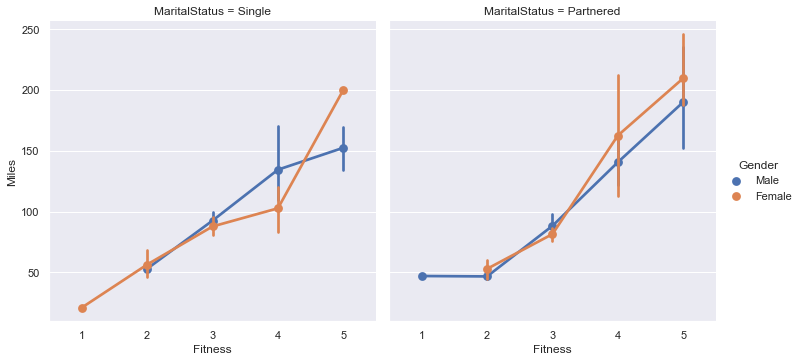

In [37]:
# Making a catplot so we can visualize the differences in means as well
sns.catplot(x="Fitness", y="Miles", data=cgf,col="MaritalStatus",hue="Gender",kind="point")

If fitness were objectively measured, both of the lines in the above graph should be linear with roughly equal amounts of variance.

The levels of 2 and 3 for Fitness are generally linear for both sexes and martial statuses.

The sample of Fitness 1 is too small to make any meaningful inferences.

Fitness level 2 is always around 50. Fitness level 3 is also relatively close together, around mid-80s. Fitness level 4 starts to become more inconsistent, with a huge 60 mile split between married and single women, whereas men stay consistently around 135-140. At fitness level 5 we see a big difference in both men and women along marital status, in opposite directions, as previously described.

An important takeaway is that Fitness 4 married women are probably _in reality_ just as fit as Fitness 5 single men. This is because the total number of miles expected to be ran is about the same for Fitness 5 single men as it is for Fitness 4 married women. Further, there is likely no significant difference between Fitness 3 and Fitness 4 single women as their means only differ by a measily 14 Miles. Fitness 4 and 5 single men are also likely to have no significant difference because their difference is only 18 miles. Statistical comparisons of means tests are recommended in all cases.

These problems could be rectified by improving the survey methodology and by increasing the amount of data collected. Please see the [Suggestions section](#surveyrec).

## <span style="font-family: Calibri; font-size:1.5em;color:#000055"> TM195 </span><a name=TM195></a>
***
Now that we know how the data plays out generally, let's begin making a customer profile for the TM195 product.

### <span style="font-family: Calibri; font-size:1.5em;color:#000055"> Descriptive statistics and distributions for TM195 </span><a name=TM195desc></a>
***

In [38]:
#Get a visual on the first 5 entries
df195.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,TM195,18,Male,14,Single,3,4,29562,112
1,TM195,19,Male,15,Single,2,3,31836,75
2,TM195,19,Female,14,Partnered,4,3,30699,66
3,TM195,19,Male,12,Single,3,3,32973,85
4,TM195,20,Male,13,Partnered,4,2,35247,47


In [39]:
#Descriptive statistics for each numerical column
df195.describe().round(2)

,Age,Education,Usage,Fitness,Income,Miles
count,80.00,80.00,80.00,80.00,80.00,80.00
mean,28.55,15.04,3.09,2.96,46418.02,82.79
std,7.22,1.22,0.78,0.66,9075.78,28.87
min,18.00,12.00,2.00,1.00,29562.00,38.00
25%,23.00,14.00,3.00,3.00,38658.00,66.00
50%,26.00,16.00,3.00,3.00,46617.00,85.00
75%,33.00,16.00,4.00,3.00,53439.00,94.00
max,50.00,18.00,5.00,5.00,68220.00,188.00


In [40]:
# The shape of the dataframe (rows, columns)
df195.shape

(80, 9)

In [41]:
# Total number of cells in the dataframe
df195.size

720

In [42]:
#double check data types
df195.dtypes.value_counts()

int64     6
object    3
dtype: int64

We have 80 observations across 9 columns.
There should be no missing values etc. as this is a split from the overall data, which contained no missing values.

In [43]:
#Checking for how skewed the data is.
#First, remove qualitative data
numcol195 = df195.select_dtypes(exclude=["object"]).columns
print(numcol195)
#Now check skewness of the quantitative data
for i in numcol195:
    print("Column: ",i," has skewness ",df195[i].skew()) #close to 0 is low skewness.

Index(['Age', 'Education', 'Usage', 'Fitness', 'Income', 'Miles'], dtype='object')
Column:  Age  has skewness  0.9788278518677155
Column:  Education  has skewness  -0.2030943750828036
Column:  Usage  has skewness  0.16912969415434737
Column:  Fitness  has skewness  0.306533987277083
Column:  Income  has skewness  0.17662141010372912
Column:  Miles  has skewness  1.008913353896694


There is no substantial skew for the TM195 as it is all between -1 and 1 (if we round Miles), unlike overall where we saw some skew for Miles.

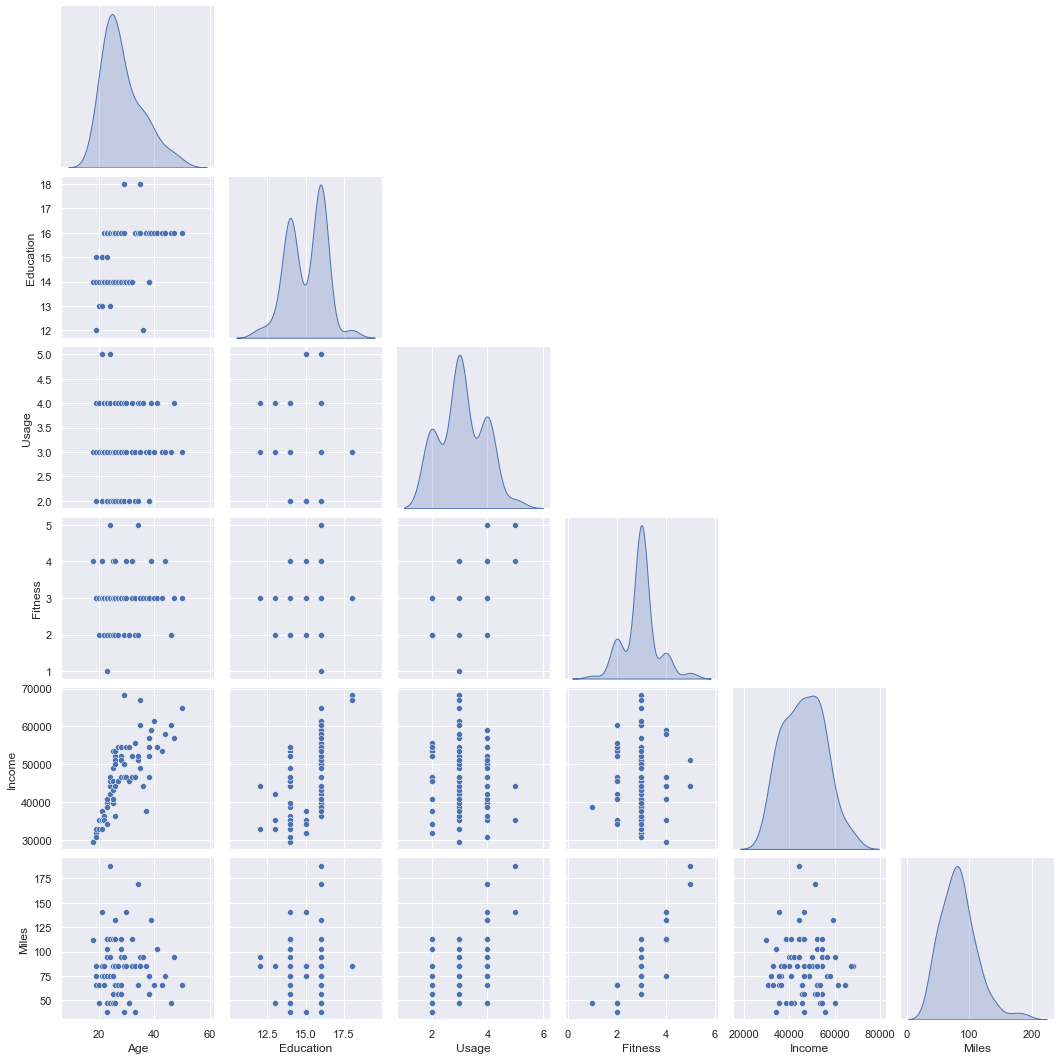

In [44]:
#Making a pairplot for increased readability
sns.pairplot(df195,corner=True,diag_kind='kde')

A visual inspection of the TM195 data show no obvious non-linear relationships, though some correlations disappeared.

Of note is that the Education variable density is double-peaked. Let's look into that.

Text(0.5, 1.0, 'TM 195 Education Distribution')

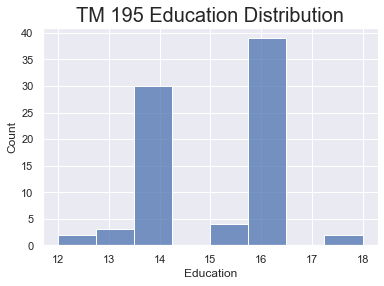

In [45]:
#a histogram will give us a closer look at that double peak
sns.histplot(df195["Education"])
plt.title("TM 195 Education Distribution", fontsize=20)

Oddly, the split occurs on 14 and 16 years, which is associates degree vs. bachelor's degree rather than highschool (which would be 12).

In [46]:
#let's get definite numbers on education by using .size()
df195.groupby(by=['Education']).size()

Education
12     2
13     3
14    30
15     4
16    39
18     2
dtype: int64

With this we can confidently say that the vast majority of consumers of TM195 have some degree of advanced degree, or are working towards a degree, with the large majority having completed only an associates degree (30) or bachelor's degree (39).

#### <span style="font-family: Calibri; font-size:1.5em;color:#000055"> Correlations between variables for TM195 </span><a name=TM195corr></a>

In [47]:
#correlation table
df195.corr().round(2)

,Age,Education,Usage,Fitness,Income,Miles
Age,1.00,0.34,-0.02,0.05,0.75,-0.06
Education,0.34,1.00,0.17,0.11,0.45,0.11
Usage,-0.02,0.17,1.00,0.47,-0.05,0.65
Fitness,0.05,0.11,0.47,1.00,0.01,0.83
Income,0.75,0.45,-0.05,0.01,1.00,-0.04
Miles,-0.06,0.11,0.65,0.83,-0.04,1.00


<AxesSubplot:>

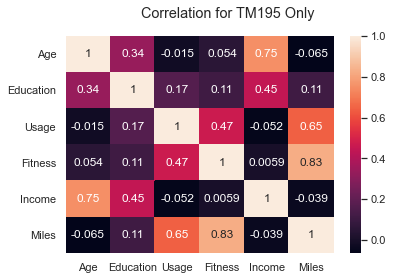

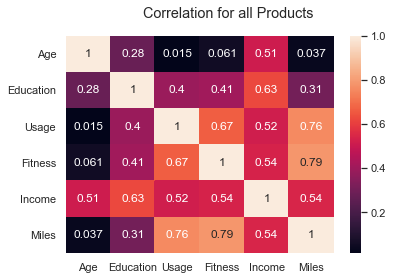

In [48]:
#linear correlation heatmap for better readability
fig, ax = plt.subplots(1,1)
fig.suptitle("Correlation for TM195 Only")
sns.heatmap(df195.corr(), annot=True)

#reprinting linear correlation matrix for the data as a whole for easy comparison
fig, ax = plt.subplots(1,1)
fig.suptitle("Correlation for all Products")
sns.heatmap(cgf.corr(), annot=True)

For TM195, income's relationship with all use variables vanishes, leaving only linear relationships with Age and Education. Income does not seem to influence how much TM195 will be purchased (or vice versa).

Education's linear relationships also substantially decreased for all use variables. Education does not seem to influence how much TM195 will be used.

### <span style="font-family: Calibri; font-size:1.5em;color:#000055">Gender and TM195 </span></span><a name=TM195gender></a>
***
Given the interesting effects we saw on the data overall, a more in-depth investigation of MaritalStatus is warranted. However, the largest differences appeared between Fitness 4 and 5, yet almost all of the customers for TM195 are fitness level 3. We can see that from the above univariate distribution graph and description. Let's get the raw numbers.

In [49]:
df195.groupby(by=["Gender"]).describe().round(2).T

Gender             Female      Male
Age       count     40.00     40.00
          mean      28.45     28.65
          std        7.11      7.42
          min       19.00     18.00
          25%       23.75     23.00
          50%       26.50     26.00
          75%       32.25     34.25
          max       50.00     47.00
Education count     40.00     40.00
          mean      15.10     14.98
          std        1.08      1.35
          min       14.00     12.00
          25%       14.00     14.00
          50%       15.50     16.00
          75%       16.00     16.00
          max       18.00     18.00
Usage     count     40.00     40.00
          mean       2.90      3.28
          std        0.78      0.75
          min        2.00      2.00
          25%        2.00      3.00
          50%        3.00      3.00
          75%        3.00      4.00
          max        5.00      5.00
Fitness   count     40.00     40.00
          mean       2.88      3.05
          std        0.65      0.68
          min        2.00      1.00
          25%        2.75      3.00
          50%        3.00      3.00
          75%        3.00      3.00
          max        5.00      5.00
Income    count     40.00     40.00
          mean   46020.08  46815.98
          std     9226.21   9022.41
          min    30699.00  29562.00
          25%    37521.00  40647.75
          50%    46048.50  46617.00
          75%    52302.00  53723.25
          max    67083.00  68220.00
Miles     count     40.00     40.00
          mean      76.20     89.38
          std       27.99     28.57
          min       38.00     47.00
          25%       56.00     75.00
          50%       75.00     85.00
          75%       87.25    105.25
          max      188.00    169.00

Overall the two genders seem very similar for TM195, with little difference in every category. Men who purchased TM195 tend to be more fit, and fit people tend to use their treadmills more, so that is likely why Miles is slightly higher for men.

### <span style="font-family: Calibri; font-size:1.5em;color:#000055">Marital Status and TM195 </span><a name=TM195marital></a>
***

In [50]:
#reprinting overall data distribution for easy comparisons
cgf.groupby(by=["MaritalStatus"]).size().reset_index(name='count')

,MaritalStatus,count
0,Partnered,107
1,Single,73


In [51]:
#printing TM195's distribution along MaritalStatus only
df195.groupby(by=["MaritalStatus"]).size().reset_index(name='count')

,MaritalStatus,count
0,Partnered,48
1,Single,32


As we saw in the Pandas Profile of the overall dataset, many more partnered individuals purchased treadmills than singles, by a difference of 34: 59% of customers were partnered, and 41% were single. This difference remains proportionally identical for the TM195: 60% were partnered, and 40% were single. This implies MaritalStatus alone did not change people's preferences for the TM195.

In [52]:
# display fitness levels for TM195 purchasers
df195.groupby(by=["Fitness"]).size().reset_index(name='count')

,Fitness,count
0,1,1
1,2,14
2,3,54
3,4,9
4,5,2


Of the 80 customers who bought TM195, only 11 rated themselves above Fitness 3. My hypothesis, then, is that Marital Status will be inconsequential to how much TM195 is used.

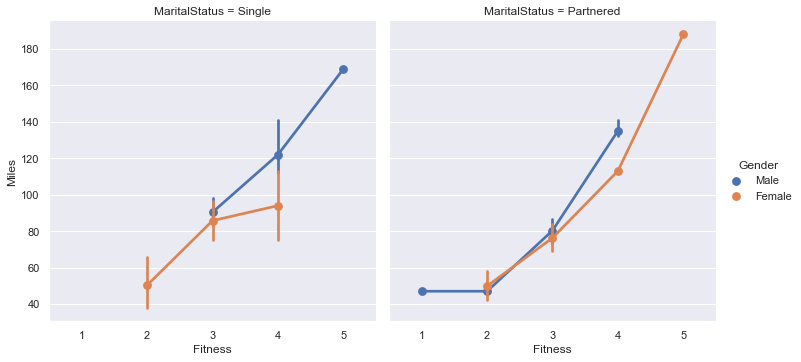

In [53]:
# Making a catplot so we can visualize the differences in means as well
sns.catplot(x="Fitness", y="Miles", data=df195,col="MaritalStatus",hue="Gender",kind="point")

As expected, a lot of the effect MaritalStatus seen in the overall analysis [here](#ovmarital)  vanished because of the absence of higher Fitness people, where the phenomenon occurred. Of note is that there seem to be no single men of low fitness who bought TM195 and no high fitness married men who bought TM195. There are also no single women with high fitness who bought TM195.

Let's look at some raw numbers to confirm that.

In [54]:
#Splitting the data by Gender and MaritalStatus for easier analysis
marrieddude195 = df195.loc[(df195.Gender.values == "Male") &
                         (df195.MaritalStatus.values == "Partnered")]
singledude195 = df195.loc[(df195.Gender.values == "Male") &
                         (df195.MaritalStatus.values == "Single")]
marriedlady195 = df195.loc[(df195.Gender.values == "Female") &
                         (df195.MaritalStatus.values == "Partnered")]
singlelady195 = df195.loc[(df195.Gender.values == "Female") &
                         (df195.MaritalStatus.values == "Single")]

In [55]:
#Confirmation of the count for single men
singledude195.groupby(by=["Fitness"]).size().reset_index(name='count')

,Fitness,count
0,3,15
1,4,3
2,5,1


Indeed, there are no low-fitness single men who bought the TM195. Now let's look at the single ladies.

In [56]:
#Confirmation of the count for single ladies
singlelady195.groupby(by=["Fitness"]).size().reset_index(name='count')

,Fitness,count
0,2,3
1,3,8
2,4,2


Contrarily, there are no level 5 fitness single women who bought the TM195. This is hardly surprising, given there was only one of those in the overall data.

As a reminder, according to our previous analysis Fitness 3 and 4 single women should be considered identical as their use of the treadmill is almost identical.

Now, from our previous analysis, we know that there are 13 Fitness 5 married men in the overall sample. Yet none of them use TM195? 

In [57]:
#Confirmation of the count for married men
marrieddude195.groupby(by=["Fitness"]).size().reset_index(name='count')

,Fitness,count
0,1,1
1,2,4
2,3,13
3,4,3


Indeed, highly fit married men didn't buy the TM195 even once.

In [58]:
#Confirmation of the count for married women
marriedlady195.groupby(by=["Fitness"]).size().reset_index(name='count')

,Fitness,count
0,2,7
1,3,18
2,4,1
3,5,1


Of the 5 Fitness 5 married women in the sample, only 1 chose the TM195. Really, the TM195 is just very unpopular among highly fit people of all groups.

## <span style="font-family: Calibri; font-size:1.5em;color:#000055"> TM498</span><a name=TM498></a>
***
Now that we've examined TM195, let's do the same for TM498

### <span style="font-family: Calibri; font-size:1.5em;color:#000055"> Descriptive statistics and distributions for TM498</span><a name=TM498desc></a>
***

In [59]:
#Get a visual on the first 5 entries
df498.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
80,TM498,19,Male,14,Single,3,3,31836,64
81,TM498,20,Male,14,Single,2,3,32973,53
82,TM498,20,Female,14,Partnered,3,3,34110,106
83,TM498,20,Male,14,Single,3,3,38658,95
84,TM498,21,Female,14,Partnered,5,4,34110,212


In [60]:
#Descriptive statistics for each numerical column
df498.describe().round(2)

,Age,Education,Usage,Fitness,Income,Miles
count,60.00,60.00,60.00,60.00,60.00,60.00
mean,28.90,15.12,3.07,2.90,48973.65,87.93
std,6.65,1.22,0.80,0.63,8653.99,33.26
min,19.00,12.00,2.00,1.00,31836.00,21.00
25%,24.00,14.00,3.00,3.00,44911.50,64.00
50%,26.00,16.00,3.00,3.00,49459.50,85.00
75%,33.25,16.00,3.25,3.00,53439.00,106.00
max,48.00,18.00,5.00,4.00,67083.00,212.00


In [61]:
#Shape of the dataframe
df498.shape

(60, 9)

In [62]:
#Total number of cells in the dataframe
df498.size

540

In [63]:
#double check data types
df498.dtypes.value_counts()

int64     6
object    3
dtype: int64

We have 60 observations across 9 columns.
There should be no missing values etc. as this is a split from the overall data, which contained no missing values.

In [64]:
#Checking for how skewed the data is.
#First, remove qualitative data
numcol498 = df498.select_dtypes(exclude=["object"]).columns
print(numcol498)
#Now check skewness of the quantitative data
for i in numcol498:
    print("Column: ",i," has skewness ",df498[i].skew()) #close to 0 is low skewness.

Index(['Age', 'Education', 'Usage', 'Fitness', 'Income', 'Miles'], dtype='object')
Column:  Age  has skewness  0.7131564527378573
Column:  Education  has skewness  -0.11475734755806193
Column:  Usage  has skewness  0.4948744212984971
Column:  Fitness  has skewness  -0.34537474660737577
Column:  Income  has skewness  -0.010549771540498212
Column:  Miles  has skewness  1.0900653220213874


There is no substantial skew for the TM498 as it is all between -1 and 1 with the small exception of Miles, though it is only slightly positively skewed.

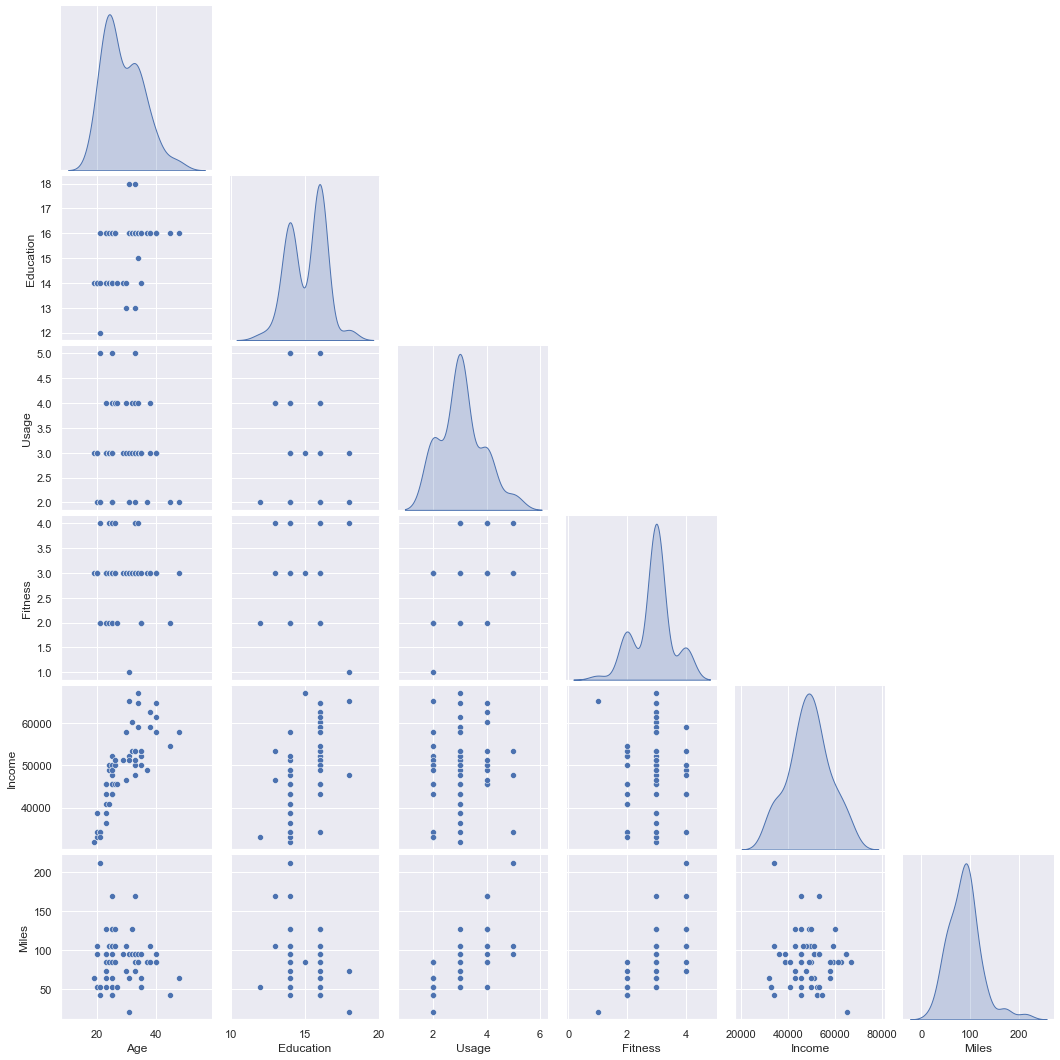

In [65]:
#Making a pairplot for increased readability
sns.pairplot(df498,corner=True,diag_kind='kde')

A visual inspection of the TM195 data show no obvious non-linear relationships, though some correlations disappeared.

Of note is that the Education variable density is double-peaked.

Text(0.5, 1.0, 'Education Distribution for TM498')

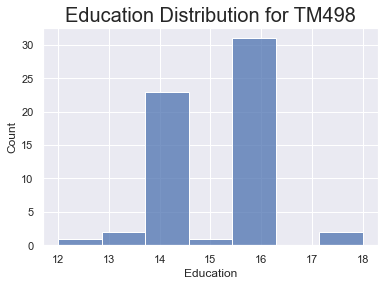

In [66]:
#a histogram will give us a closer look at that double peak
sns.histplot(df498["Education"])
plt.title("Education Distribution for TM498", fontsize=20)

In [67]:
#let's get definite numbers on education by using .size()
df498.groupby(by=['Education']).size().reset_index(name='count')

,Education,count
0,12,1
1,13,2
2,14,23
3,15,1
4,16,31
5,18,2


Here we see the same distribution as in TM195. The vast majority of customers have an associates degree or bachelor's degree.

### <span style="font-family: Calibri; font-size:1.5em;color:#000055"> Correlations between variables for TM498 </span><a name=TM498corr></a>
***

In [68]:
#correlation table
df498.corr().round(2)

,Age,Education,Usage,Fitness,Income,Miles
Age,1.00,0.47,-0.08,-0.03,0.79,-0.12
Education,0.47,1.00,-0.11,-0.09,0.54,-0.24
Usage,-0.08,-0.11,1.00,0.35,0.07,0.67
Fitness,-0.03,-0.09,0.35,1.00,-0.01,0.68
Income,0.79,0.54,0.07,-0.01,1.00,-0.05
Miles,-0.12,-0.24,0.67,0.68,-0.05,1.00


<AxesSubplot:>

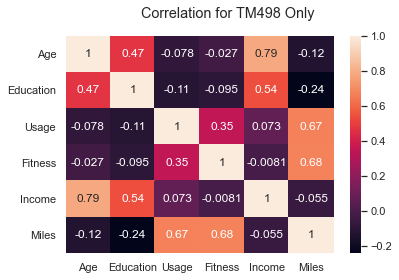

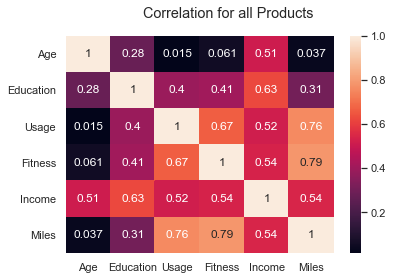

In [69]:
#linear correlation heatmap for better readability
fig, ax = plt.subplots(1,1)
fig.suptitle("Correlation for TM498 Only")
sns.heatmap(df498.corr(), annot=True)

#reprinting linear correlation matrix for the data as a whole for easy comparison
fig, ax = plt.subplots(1,1)
fig.suptitle("Correlation for all Products")
sns.heatmap(cgf.corr(), annot=True)

For TM498, income's relationship with all use variables vanishes, leaving only linear relationships with Age and Education. Income does not seem to influence how much TM498 will be used (or vice versa).

Education's linear relationships also substantially decreased for all use variables. Education does not seem to influence how much TM498 will be used.

### <span style="font-family: Calibri; font-size:1.5em;color:#000055"> Gender and TM498</span><a name=TM498gender></a>
***
Again, MaritalStatus and Gender are obscured in the above analysis because of their categorical nature. Let's take a closer look.

In [70]:
#displaying general stats for TM498 across gender and each other variable
df498.groupby(by=["Gender"]).describe().round(2).T

Gender             Female      Male
Age       count     29.00     31.00
          mean      29.10     28.71
          std        5.80      7.44
          min       20.00     19.00
          25%       25.00     23.00
          50%       29.00     25.00
          75%       33.00     33.50
          max       40.00     48.00
Education count     29.00     31.00
          mean      15.21     15.03
          std        1.29      1.17
          min       13.00     12.00
          25%       14.00     14.00
          50%       16.00     16.00
          75%       16.00     16.00
          max       18.00     16.00
Usage     count     29.00     31.00
          mean       3.14      3.00
          std        0.92      0.68
          min        2.00      2.00
          25%        3.00      3.00
          50%        3.00      3.00
          75%        4.00      3.00
          max        5.00      4.00
Fitness   count     29.00     31.00
          mean       2.86      2.94
          std        0.69      0.57
          min        1.00      2.00
          25%        3.00      3.00
          50%        3.00      3.00
          75%        3.00      3.00
          max        4.00      4.00
Income    count     29.00     31.00
          mean   49336.45  48634.26
          std     7984.49   9356.20
          min    34110.00  31836.00
          25%    45480.00  44343.00
          50%    48891.00  50028.00
          75%    52302.00  53439.00
          max    65220.00  67083.00
Miles     count     29.00     31.00
          mean      87.34     88.48
          std       33.46     33.63
          min       21.00     42.00
          25%       74.00     58.50
          50%       85.00     95.00
          75%       95.00    106.00
          max      212.00    170.00

Overall there seems to be no huge differences between the men and women who bought TM498. There isn't even a big difference in Fitness or Miles.

### <span style="font-family: Calibri; font-size:1.5em;color:#000055">Marital Status and TM498</span><a name=TM498marital></a>
***
As a reminder, overall 59% of customers were partnered, and 41% were single. There was no difference for TM195, let's see if that holds true for TM498.

In [71]:
# printing TM498's distribution along MaritalStatus only
df498.groupby(by=["MaritalStatus"]).size().reset_index(name='count')

,MaritalStatus,count
0,Partnered,36
1,Single,24


This difference remains proportionally identical for the TM498: 60% were partnered, and 40% were single. This implies MaritalStatus alone did not change people's preferences for the TM195.

In [72]:
# display fitness levels for TM498 purchasers
df498.groupby(by=["Fitness"]).size().reset_index(name='count')

,Fitness,count
0,1,1
1,2,12
2,3,39
3,4,8


This fitness distribution is almost identical to TM195. In fact, the preference for it from high fitness customers is even lower, and there are zero customers who rated themselves as Fitness 5 who purchased it.

MaritalStatus probably has no impact on the customer base, but I'll go ahead and take a look at it anyway.

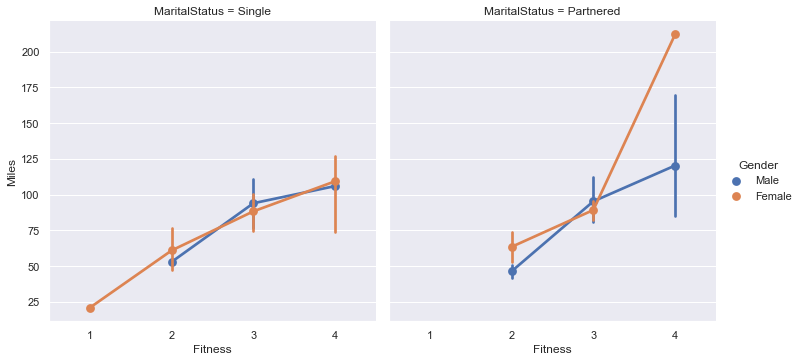

In [73]:
# Making a catplot so we can visualize the differences in means as well
sns.catplot(x="Fitness", y="Miles", data=df498,col="MaritalStatus",hue="Gender",kind="point")

Nothing strange going on for the singles, but married women sees a huge spike in usage. Let's see what's going on there. I have a feeling it is a problem with a small sample.

In [74]:
#Pulling up the Fitness 4 married women for TM498
df498.loc[(df498.Gender.values == "Female") & (df498.Fitness.values == 4)&
                         (df498.MaritalStatus.values == "Partnered")]

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
84,TM498,21,Female,14,Partnered,5,4,34110,212


Ah, only one married woman with a Fitness level of 4 bought the TM498. This is hardly representative. We'd need more data to make an inference. Even so, it's telling that so few Fitness 4 or 5 people bought the TM498.

## <span style="font-family: Calibri; font-size:1.5em;color:#000055"> TM798 </span><a name=TM798></a>
***
Now it is time to examine the third product, TM798.

### <span style="font-family: Calibri; font-size:1.5em;color:#000055"> Descriptive statistics and distributions for TM798</span><a name=TM798desc></a>
***

In [75]:
#Get a visual on the first 5 entries
df798.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
140,TM798,22,Male,14,Single,4,3,48658,106
141,TM798,22,Male,16,Single,3,5,54781,120
142,TM798,22,Male,18,Single,4,5,48556,200
143,TM798,23,Male,16,Single,4,5,58516,140
144,TM798,23,Female,18,Single,5,4,53536,100


In [76]:
#Descriptive statistics for each numerical column
df798.describe().round(2)

,Age,Education,Usage,Fitness,Income,Miles
count,40.00,40.00,40.00,40.00,40.00,40.00
mean,29.10,17.32,4.78,4.62,75441.58,166.90
std,6.97,1.64,0.95,0.67,18505.84,60.07
min,22.00,14.00,3.00,3.00,48556.00,80.00
25%,24.75,16.00,4.00,4.00,58204.75,120.00
50%,27.00,18.00,5.00,5.00,76568.50,160.00
75%,30.25,18.00,5.00,5.00,90886.00,200.00
max,48.00,21.00,7.00,5.00,104581.00,360.00


In [77]:
# Shape of the dataframe
df798.shape

(40, 9)

In [78]:
# Total number of cells in the dataframe
df798.size

360

In [79]:
#double check data types
df798.dtypes.value_counts()

int64     6
object    3
dtype: int64

In [80]:
#Checking for how skewed the data is.
#First, remove qualitative data
numcol798 = df798.select_dtypes(exclude=["object"]).columns
print(numcol798)
#Now check skewness of the quantitative data
for i in numcol798:
    print("Column: ",i," has skewness ",df798[i].skew()) #close to 0 is low skewness.

Index(['Age', 'Education', 'Usage', 'Fitness', 'Income', 'Miles'], dtype='object')
Column:  Age  has skewness  1.4484671175300194
Column:  Education  has skewness  0.4013033883627223
Column:  Usage  has skewness  0.6694340601812012
Column:  Fitness  has skewness  -1.5742165834918735
Column:  Income  has skewness  -0.07964639123353463
Column:  Miles  has skewness  1.1340326002360452


Compared to the other products, TM798 has many more slightly skewed data distributions.
Age is slightly positively skewed.
Fitness is slightly negatively skewed.
Miles is slightly positively skewed, as with all other products.

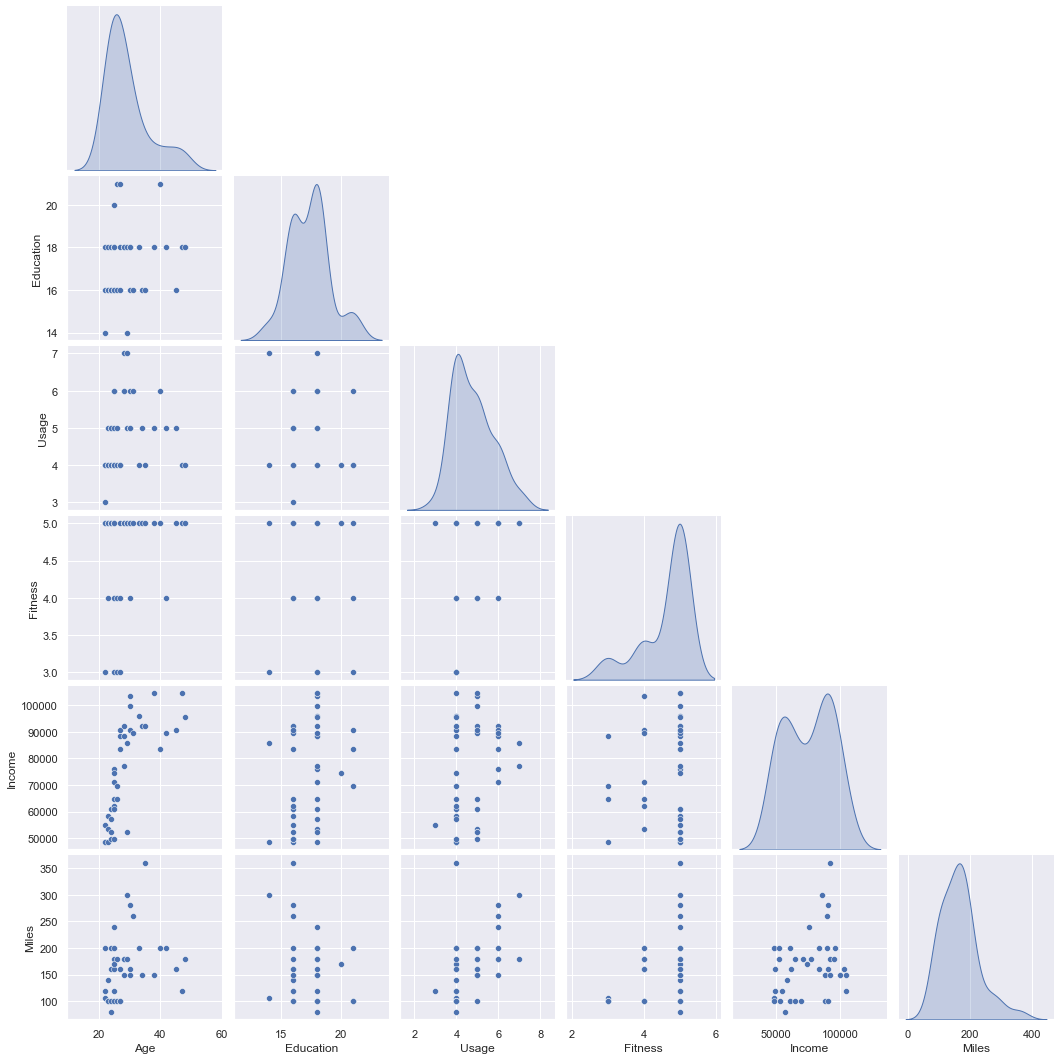

In [81]:
#Making a pairplot for increased readability
sns.pairplot(df798,corner=True,diag_kind='kde')

A visual inspection of the TM195 data show no obvious non-linear relationships, though some correlations disappeared.

Of note is that the double peak of the Education variable has mostly vanished compared to the other products. Meanwhile, Income has a slight double-peak.

#### <span style="font-family: Calibri; font-size:1.5em;color:#000055">Education and TM798 </span><a name=TM798edu></a>
***

Text(0.5, 1.0, 'Education Distribution for TM798')

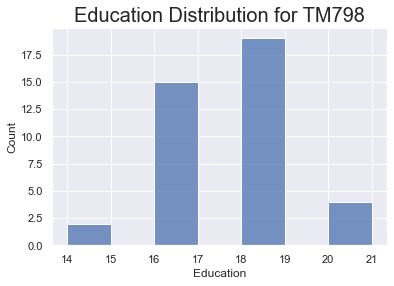

In [82]:
#a histogram will give us a closer look at that Education double peak
sns.histplot(df798["Education"])
plt.title("Education Distribution for TM798", fontsize=20)

In [83]:
# Let's get the raw count for Education too.
df798.groupby(by=["Education"]).size().reset_index(name='count')

,Education,count
0,14,2
1,16,15
2,18,19
3,20,1
4,21,3


For the TM798, we can say that its customers tend to have either a bachelor's degree or a master's degree, with several potentially having PhDs as well.
TM798 seems favored by those with advanced degrees.

#### <span style="font-family: Calibri; font-size:1.5em;color:#000055"> Income and TM798</span><a name=TM798income></a>
***
Income also warrants a closer look.

Text(0.5, 1.0, 'Income Distribution for TM798')

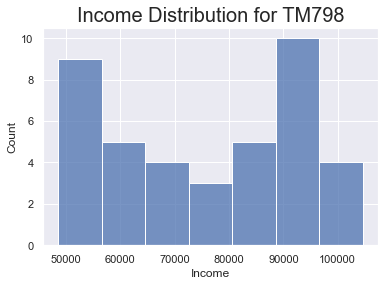

In [84]:
#a histogram will give us a closer look at that double peak
sns.histplot(df798["Income"])
plt.title("Income Distribution for TM798", fontsize=20)

This is an interesting double peak that warrants further investigation. For this, I want to group the continuous Income variable into categories.

In [85]:
#Sort the incomes into categories
IncomeBracket = pd.cut(df798.Income,bins=[40000,50000,60000,70000,80000,90000,100000,110000],
       labels=["40-50k","50-60k","60-70k","70-80k","80-90k","90-100k","100k+"])
#Insert a new column into the df798 dataframe so I can analyze the categories
df798.insert(9,"Income Bracket",IncomeBracket)
#Get a count of how many customers land in each bracket
df798.groupby(by=["Income Bracket"]).size().reset_index(name='count')

,Income Bracket,count
0,40-50k,5
1,50-60k,6
2,60-70k,6
3,70-80k,4
4,80-90k,7
5,90-100k,9
6,100k+,3


The major dip in the income distribution seems to occur in the 70-80k range, with everything else actually being fairly consistent. Even so, the mean income of those purchasing the TM798 is substantially higher than the other two products.

#### <span style="font-family: Calibri; font-size:1.5em;color:#000055">Fitness and TM798</span><a name=TM798Fitness></a>
***
Based on the scatterplots above, I also noticed that Fitness tends to be much higher for TM798 than the other products. It also is skewed, unlike with the other products. It warrants further investigation.

In [86]:
df798.groupby(by=['Fitness']).size().reset_index(name='count')

,Fitness,count
0,3,4
1,4,7
2,5,29


Of the 40 entries, 72.5% of them identified as being Fitness 5. There were no entries for those with fewer than 3 fitness scores. The typical customer for TM798 is extremely fit.

In [87]:
#Fitness count for the entire dataset for easy comparison
cgf.groupby(by=['Fitness']).size().reset_index(name='count')

,Fitness,count
0,1,2
1,2,26
2,3,97
3,4,24
4,5,31


Of the 31 total level 5 fitness customers, only 2 are not using TM798. This is a stark preference.

### <span style="font-family: Calibri; font-size:1.5em;color:#000055">Correlations between variables for TM798</span><a name=TM798corr></a>
***

In [88]:
#correlation table
df798.corr().round(2)

,Age,Education,Usage,Fitness,Income,Miles
Age,1.00,0.17,0.12,0.21,0.71,0.24
Education,0.17,1.00,-0.02,-0.17,0.25,-0.23
Usage,0.12,-0.02,1.00,0.23,0.28,0.50
Fitness,0.21,-0.17,0.23,1.00,0.11,0.39
Income,0.71,0.25,0.28,0.11,1.00,0.31
Miles,0.24,-0.23,0.50,0.39,0.31,1.00


<AxesSubplot:>

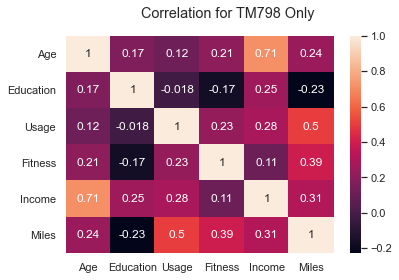

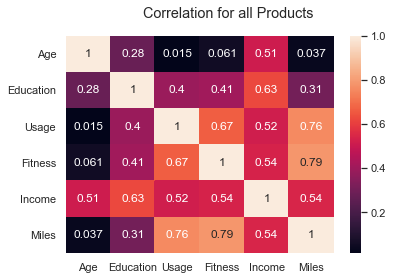

In [89]:
#linear correlation heatmap for better readability
fig, ax = plt.subplots(1,1)
fig.suptitle("Correlation for TM798 Only")
sns.heatmap(df798.corr(), annot=True)

#reprinting linear correlation matrix for the data as a whole for easy comparison
fig, ax = plt.subplots(1,1)
fig.suptitle("Correlation for all Products")
sns.heatmap(cgf.corr(), annot=True)

Unlike the other two products, Income maintained its correlations, though it too weakened slightly. Also unlike the other two products, the use variables lost a lot of correlation, dropping to be weakly correlated compared to strongly correlated.



### <span style="font-family: Calibri; font-size:1.5em;color:#000055">Gender and TM798</span><a name=TM798Gender></a>
***

In [90]:
# Displaying the mean and distribution for all variables across gender
df798.groupby(by=["Gender"]).describe().round(2).T

Gender             Female       Male
Age       count      7.00      33.00
          mean      27.00      29.55
          std        3.56       7.46
          min       23.00      22.00
          25%       24.50      25.00
          50%       26.00      27.00
          75%       29.00      31.00
          max       33.00      48.00
Education count      7.00      33.00
          mean      17.86      17.21
          std        1.68       1.63
          min       16.00      14.00
          25%       17.00      16.00
          50%       18.00      18.00
          75%       18.00      18.00
          max       21.00      21.00
Usage     count      7.00      33.00
          mean       5.00       4.73
          std        0.82       0.98
          min        4.00       3.00
          25%        4.50       4.00
          50%        5.00       4.00
          75%        5.50       5.00
          max        6.00       7.00
Fitness   count      7.00      33.00
          mean       4.57       4.64
          std        0.79       0.65
          min        3.00       3.00
          25%        4.50       4.00
          50%        5.00       5.00
          75%        5.00       5.00
          max        5.00       5.00
Income    count      7.00      33.00
          mean   73633.86   75825.03
          std    19009.93   18675.00
          min    52291.00   48556.00
          25%    57271.00   58516.00
          50%    69721.00   77191.00
          75%    91508.50   90886.00
          max    95866.00  104581.00
Miles     count      7.00      33.00
          mean     180.00     164.12
          std       63.25      60.01
          min      100.00      80.00
          25%      140.00     120.00
          50%      200.00     160.00
          75%      200.00     180.00
          max      280.00     360.00

There again is no large differences between the genders alone, though it is noteworthy that there are a LOT more men than women who bought the TM798. Unlike the other two products, the Miles mean between the two genders is lower for men than women. This is probably because of how single men rate themselves as higher than they should for their expected use. Because so many Fitness 5 men bought the TM798, the low Miles reported by the single men brought down their average.

### <span style="font-family: Calibri; font-size:1.5em;color:#000055">Marital Status and TM798</span><a name=TM798marital></a>
***
Continuing our trend, let us see if MaritalStatus has any impact on who purchases the TM798.

In [91]:
#printing TM498's distribution along MaritalStatus only
df798.groupby(by=["MaritalStatus"]).size().reset_index(name='count')

,MaritalStatus,count
0,Partnered,23
1,Single,17


Again we see a split very similar to the overall database of 58% partnered and 42% single. This means it is unlikely to have much of an influence.

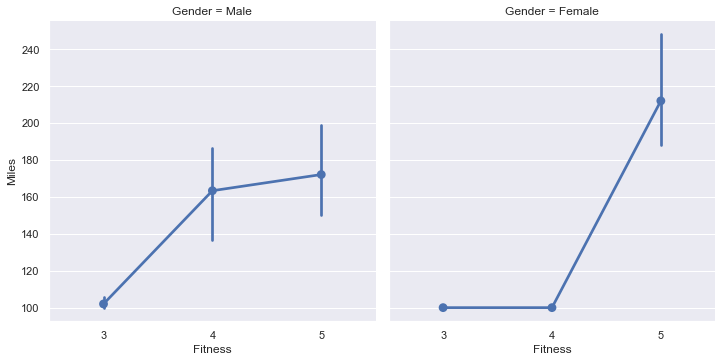

In [92]:
# Making a catplot so we can visualize the differences in means as well
sns.catplot(x="Fitness", y="Miles", data=df798,col="Gender",kind="point")

When I tried to split by MaritalStatus and give Gender a hue like I did for the other treadmills I received an error. I think this is because the sample sizes just became too small. Let me check.

In [93]:
#Pull up just the single ladies
df798.loc[(df798.Gender.values == "Female")& 
          (df798.MaritalStatus.values == "Single")].groupby(by=["Fitness"]
                                                           ).size().reset_index(name='count')

,Fitness,count
0,3,1
1,4,1
2,5,1


In [94]:
#Pull up just the married ladies
df798.loc[(df798.Gender.values == "Female")& 
          (df798.MaritalStatus.values == "Partnered")].groupby(by=["Fitness"]
                                                           ).size().reset_index(name='count')

,Fitness,count
0,5,4


Both of these samples are extremely small and there are no Fitness 1, 2, 3, or 4 married women. Therefore it cannot be plotted on a point graph; there is only one point. That's what caused the error when I tried to hue Gender.

Overall it is quite hard to draw any inferences here because of the dearth of Fitness 5 women in general. However, of the Fitness 5 women, they still overwhelmingly chose TM798, same as the men.

## <span style="font-family: Calibri; font-size:1.5em;color:#000055"> Product Comparisons</span><a name=prodcom></a>
***
Now that we have looked at the overall data and the three products specifically, it's time to put them all side by side so we can draw inferences about them.

In [95]:
#Making a new table with all the means next to each other for each product and variable.
#First make a dictionary
crossmeans = {"TM195 Means":[df195["Age"].mean(),
                             df195["Education"].mean(),
                             df195["Usage"].mean(),
                             df195["Fitness"].mean(),
                             df195["Income"].mean(),
                             df195["Miles"].mean()],
          "TM498 Means": [df498["Age"].mean(),
                             df498["Education"].mean(),
                             df498["Usage"].mean(),
                             df498["Fitness"].mean(),
                             df498["Income"].mean(),
                             df498["Miles"].mean()],
          "TM798 Means": [df798["Age"].mean(),
                             df798["Education"].mean(),
                             df798["Usage"].mean(),
                             df798["Fitness"].mean(),
                             df798["Income"].mean(),
                             df798["Miles"].mean()]}

#Then turn it into a dataframe with column and index labels
crosstable = pd.DataFrame(crossmeans, columns = ["TM195 Means","TM498 Means",
                                              "TM798 Means"],
                          index=["Age","Education","Usage","Fitness","Income","Miles"])


In [96]:

# Making a new table with all the means of just male customers 
# next to each other for each product and variable.
df195m = df195.loc[(df195.Gender.values == "Male")]
df498m = df498.loc[(df498.Gender.values == "Male")]
df798m = df798.loc[(df798.Gender.values == "Male")]

# Make a dictionary
crossmeansm = {"TM195 Male Means":[df195m["Age"].mean(),
                             df195m["Education"].mean(),
                             df195m["Usage"].mean(),
                             df195m["Fitness"].mean(),
                             df195m["Income"].mean(),
                             df195m["Miles"].mean()],
          "TM498 Male Means": [df498m["Age"].mean(),
                             df498m["Education"].mean(),
                             df498m["Usage"].mean(),
                             df498m["Fitness"].mean(),
                             df498m["Income"].mean(),
                             df498m["Miles"].mean()],
          "TM798 Male Means": [df798m["Age"].mean(),
                             df798m["Education"].mean(),
                             df798m["Usage"].mean(),
                             df798m["Fitness"].mean(),
                             df798m["Income"].mean(),
                             df798m["Miles"].mean()]}

#Then turn it into a dataframe with column and index labels
crosstablem = pd.DataFrame(crossmeansm, columns = ["TM195 Male Means","TM498 Male Means",
                                              "TM798 Male Means"],
                          index=["Age","Education","Usage","Fitness","Income","Miles"])

In [97]:
# Making a new table with all the means of just female customers 
# next to each other for each product and variable.

df195w = df195.loc[(df195.Gender.values == "Female")]
df498w = df498.loc[(df498.Gender.values == "Female")]
df798w = df798.loc[(df798.Gender.values == "Female")]

# Make a dictionary
crossmeansw = {"TM195 Female Means":[df195w["Age"].mean(),
                             df195w["Education"].mean(),
                             df195w["Usage"].mean(),
                             df195w["Fitness"].mean(),
                             df195w["Income"].mean(),
                             df195w["Miles"].mean()],
          "TM498 Female Means": [df498w["Age"].mean(),
                             df498w["Education"].mean(),
                             df498w["Usage"].mean(),
                             df498w["Fitness"].mean(),
                             df498w["Income"].mean(),
                             df498w["Miles"].mean()],
          "TM798 Female Means": [df798w["Age"].mean(),
                             df798w["Education"].mean(),
                             df798w["Usage"].mean(),
                             df798w["Fitness"].mean(),
                             df798w["Income"].mean(),
                             df798w["Miles"].mean()]}

#Then turn it into a dataframe with column and index labels
crosstablew = pd.DataFrame(crossmeansw, columns = ["TM195 Female Means","TM498 Female Means",
                                              "TM798 Female Means"],
                          index=["Age","Education","Usage","Fitness","Income","Miles"])

I could put everything on a single table, but that would just be massive and hard to read. Therefore, I opted to split it into three tables.

In [98]:
#Printing overall means
crosstable.round(2)

,TM195 Means,TM498 Means,TM798 Means
Age,28.55,28.90,29.10
Education,15.04,15.12,17.32
Usage,3.09,3.07,4.78
Fitness,2.96,2.90,4.62
Income,46418.02,48973.65,75441.58
Miles,82.79,87.93,166.90


In [99]:
#Printing overall means for men
crosstablem.round(2)

,TM195 Male Means,TM498 Male Means,TM798 Male Means
Age,28.65,28.71,29.55
Education,14.98,15.03,17.21
Usage,3.28,3.00,4.73
Fitness,3.05,2.94,4.64
Income,46815.98,48634.26,75825.03
Miles,89.38,88.48,164.12


In [100]:
#Printing overall means for women
crosstablew.round(2)

,TM195 Female Means,TM498 Female Means,TM798 Female Means
Age,28.45,29.10,27.00
Education,15.10,15.21,17.86
Usage,2.90,3.14,5.00
Fitness,2.88,2.86,4.57
Income,46020.08,49336.45,73633.86
Miles,76.20,87.34,180.00


### <span style="font-family: Calibri; font-size:1.5em;color:#000055">Customer profiles for TM195 and TM498</span><a name=2TMprofiles></a>
***
When we put all the means next to each other, things start to become clearer.

First, the basic customer profiles for TM195 and TM498 are effectively identical. Although a statistical comparisons of means must be performed to verify this conclusion, by appearances there seem to be no differences in any quantitative variable for TM195 and TM498. Their customer profiles are just too similar in these areas.

This doesn't change at all when split by marital status either. We already showed there to be an identical split between partnered and single customers for all three products (see [here](#TM195marital) for TM195, [here](#TM498marital) for TM498, and [here](#TM798marital) for TM798).

Conclusion: The customers for TM195 and TM498 are middle-class males or females, mostly in their late 20s, have an associates or bachelor's degree, plan to use their treadmill around 3 times a week, and generally consider themselves not very fit but not unfit either.


### <span style="font-family: Calibri; font-size:1.5em;color:#000055"> Customer Profile for TM798 </span><a name=TM798prof></a>
***
TM798, on the other hand, stands out as distinct in all cases. The TM798 customer tends to be men who are highly fit, high-income, highly educated, and intend to use the treadmill 4 or more times per week. Highly fit women also prefer the TM798, but there are many fewer fit women in general buying treadmills compared to men. The below count plots will demonstrate my point:

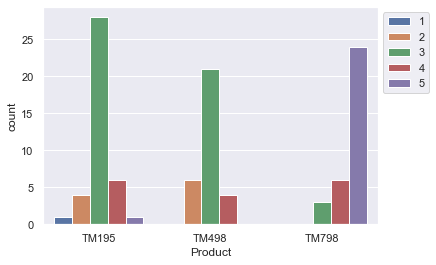

In [101]:
# Countplot for fitness level across products to emphasize TM798's differences
sns.countplot(cgf_men["Product"],hue=cgf_men["Fitness"])
plt.legend(bbox_to_anchor=(1,1)); #Location of legend moved to side

<AxesSubplot:xlabel='Product', ylabel='count'>

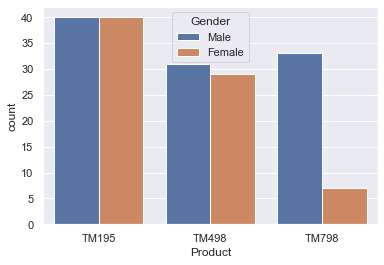

In [102]:
# Count plot of customers by product and gender to emphasize TM798's distinctiveness
sns.countplot(cgf["Product"], hue=cgf["Gender"])

If we looked at just the above count plot for gender, we'd conclude that women do not like the TM798. However, when we examine fitness, we see that there are just fewer women in general who think of themselves as fit.

<AxesSubplot:xlabel='Fitness', ylabel='count'>

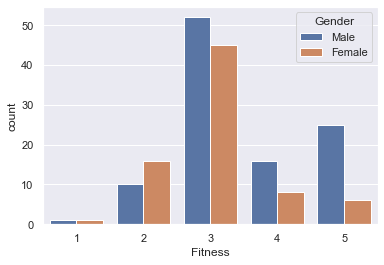

In [103]:
#Count plot of fit customers by Gender
sns.countplot(cgf["Fitness"],hue=cgf["Gender"])

As can be seen by the above fitness/gender count plot combined with the product/gender count plot, almost the entirety of Fitness 5 women buy the TM798. One may look at the increase in number of men from 4 to 5 and the decrease in number of women from 4 to 5 as an indication that the fitter the woman, the less likely they are to buy the TM798, but that would be incorrect. As we saw in our analysis of marital status, there is likely no significant difference between Fitness 3 and Fitness 4 single women, and single women at Fitness level 4 outnumber married women by 3 to 1. The difference, then, between level 4 and 5 women in the above distribution is likely because of measurement error, not because of actual preference.

Likewise, Fitness 4 and 5 single men are also likely to have no significant difference at all, though level 4 Fitness single men are outnumbered by married men, it still calls into question the usefulness of the Fitness 4 category. I would not draw any inferences at all based on the change of count to or from Fitness 4.

After tests of means are performed to confirm this finding, it may be wise to re-structure the data and move a majority of the Fitness 4 cases into either Fitness 3 or Fitness 5 based on their Miles and Usage statistics.

Thus it can be said that of women who are highly fit who buy treadmills, they still tend to buy the TM798, but that highly fit women (especially single women) just are less likely to buy treadmills in general assuming an equal proportion of fit men/women in the population.


## <span style="font-family: Calibri; font-size:1.5em;color:#000055"> Conclusion and Recommendations</span><a name=concres></a>
***

How can we sell more treadmills is an important question, and the purpose of this report is to offer insight into what strategies could be used to accomplish this goal.

We have already stated [here](#2TMprofiles) and [here](#TM798prof) who is buying the three treadmills offered at Cardio Good Fitness. However, just as important is who is _not_ buying treadmills.

### <span style="font-family: Calibri; font-size:1.5em;color:#000055"> Untapped markets </span><a name=untapped></a>
***
A huge swath of customers are not buying treadmills. First and foremost are the unfit. Fitness level 1 and 2 people of all genders, marital statuses, and ages are not buying treadmills. This is especially noteworthy given that the population of the US and most of the developed world are overweight or obese on average.

Second, older people are not buying treadmills, as can be seen below:

Text(0.5, 1.0, 'Gender, Age, and Marital Status of the Data')

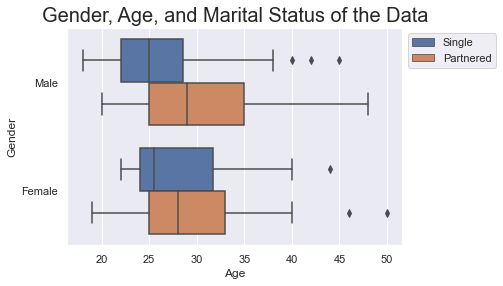

In [104]:
#Boxplot by age, gender, and marital status
sns.boxplot(cgf["Age"],cgf["Gender"], hue=cgf["MaritalStatus"])
plt.legend(bbox_to_anchor=(1,1)); #Location of legend moved to side
plt.title("Gender, Age, and Marital Status of the Data", fontsize=20)

The vast majority of customers are below age 35, but people of all ages can benefit from treadmill use. Importantly, there are almost no women over 40.

It's probably counterproductive to appeal to boys and girls below 18 as few of them have incomes (or homes) of their own with which to purchase treadmills. If we wanted to sell to this demographic, we'd want to target older people, as a 28 year old is very unlikely to have a child old enough to even use a treadmill. I suppose we can conclude not many parents are buying treadmills as gifts for their adolescent children simply because older people are absent from the sample in general.

Thirdly, men seem to prefer treadmills to women

Text(0.5, 1.0, 'Count by Gender for the Data Overall')

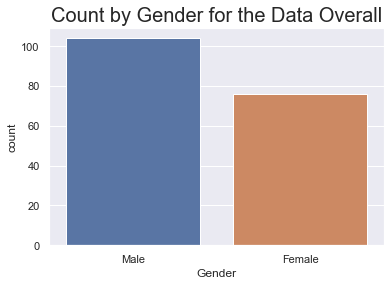

In [105]:
#countplot for gender
sns.countplot(cgf["Gender"])
plt.title("Count by Gender for the Data Overall", fontsize=20)

Given the physical need for exercise is equal across men and women, it is telling that women are not buying treadmills at the same rate as men are.

There also seems to be a married preference for treadmills across both genders

Text(0.5, 1.0, 'Gender and MaritalStatus Count for the Data')

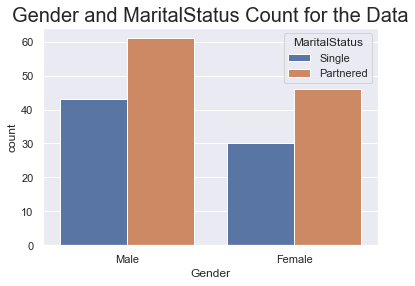

In [106]:
#countplot for gender
sns.countplot(cgf["Gender"], hue=cgf["MaritalStatus"])
plt.title("Gender and MaritalStatus Count for the Data", fontsize=20)

In the United States, the average age for marriage in 2019 was 31 for women and 33 for men. Given the average customer for all treadmills is below this number across genders, this lopsided preference is _very_ odd. One possible explanation is that the data was collected in a country with much lower average age of marriage. However, the dataset lacks geographical information to clarify this point. Regardless, I think it likely there to be a preference for treadmills among married people.

Lastly, the uneducated do not seem to be buying treadmills.

In [107]:
#Sort education into categories
edudegree = pd.cut(cgf.Education,bins=[0,11,12,14,16,18,30],
       labels=["Highschool Dropout","Highschool Graduate",
               "Associate's Degree","Bachelors","Master's Degree",
               "PhD and postdoc"])
#Insert a new column into the cgf dataframe so I can analyze the categories
cgf.insert(9,"Edu. Degree",edudegree)
#Get a count of how many customers land in each bracket
cgf.groupby(by=["Edu. Degree"]).size().reset_index(name='count')

,Edu. Degree,count
0,Highschool Dropout,0
1,Highschool Graduate,3
2,Associate's Degree,60
3,Bachelors,90
4,Master's Degree,23
5,PhD and postdoc,4


Of the 180 customers that bought treadmills, only 3 had no college experience. In the USA, 28.1% of people 25 and older have only attained a highschool degree. If treadmill sales were spread equally among educated people in the US, then we are missing a huge number of customers by neglecting this demographic.

Of course once again geographic data would have been useful here, but I think it unlikely Cardio Good Fitness is located in a location with far more college graduates. The population of very few countries is weighted towards college education: most people worldwide are not educated.

One factor here is that education and income are highly correlated in the population and among our treadmill sample as well. It could be that uneducated people simply cannot afford treadmills. Let's examine this possibility.

Text(0.5, 1.0, 'Income Distribution for the Data')

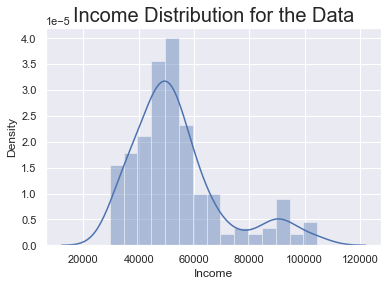

In [108]:
#reprinting the distplot for income for easy reference.
sns.distplot(cgf["Income"]); 
plt.title("Income Distribution for the Data", fontsize=20)

The number of people buying treadmills drops off steeply below 50k and vanishes entirely after just under 30k a year.

The median income in the USA for age 28 in 2020 was 40,000 (reported [here](#https://dqydj.com/average-median-top-income-by-age-percentiles/)). Whereas the median income of our dataset is 50,596.5 as seen in our Pandas Profile report above. This means if we were appealing equally across income brackets we'd see a lot more lower income people of this age group buying treadmills.

Without a price point for the treadmill products it is very difficult to say how the cost of the treadmills affected sales between products. This should be included in future datasets.

In conclusion, if we wanted to make a profile for the customer least likely to buy the current three treadmills, it would be unfit, undeducated, low-income, single older women.

### <span style="font-family: Calibri; font-size:1.5em;color:#000055"> Recommendations </span><a name=recomm></a>
***
#### <span style="font-family: Calibri; font-size:1.5em;color:#000055"> Product-related recommendations </span><a name=prodrecs></a>
In our comparison between the three treadmills, we discovered that TM195 and TM498 have strikingly similar customer profiles. The major difference between the two was that TM195 was, overall, preferred by that type of customer: More people bought a TM195 than a TM498. Without additional feature information, I must conclude that these two treadmills are competing with one another for the same customers.

My recommendation therefore is to stop selling TM498, and replace it with a treadmill likely to appeal to customers currently not buying treadmills at all (see the analysis above). Current potential customers of TM498 should be encouraged to look at TM195 instead. This saves valuable shelf-space while increasing the distinction between products and appealing to a wider general customer base.

Which of the traits absent in our current customer base is most important to target is outside the scope of this report. I would need population data for the geographic region where Cardio Good Fitness is located as well as data for potential replacement products at a minimum to make such a recommendation.

#### <span style="font-family: Calibri; font-size:1.5em;color:#000055"> Survey-related recommendations </span><a name=surveyrec></a>
It quickly became apparent that the information present in the dataset is insufficient to the task. For one, the amount of data is too small. For meaningful comparison of means to be conducted, we need approximately 30 entries per cross-category. Once I began dividing up the data by variable, I discovered very few cross-categories had this number of people. There was only 1 Fitness 5 single woman. We just need more data.

The quality of the data also should be improved. Subjective measures such as self-reports are grossly flawed, as was demonstrated in the MaritalStatus section [here](#ovmarital). It would be better and not more time consuming to simply ask the customer for an objective benchmark of fitness. For example, "How many miles can you jog before tiring." Then you only have to deal with memory errors.

Additionally, the single men of the dataset were likely inflating their fitness numbers, and the women deflating theirs. This can be caused by a variety of factors, including the sex and attractiveness of the person delivering the survey. To mitigate this bias, the survey provider should give a computerized survey, make it clear they will be unable to see the results, and step away from the customer as they fill out the survey.

More concrete recommendations could be made if exactly how the data was collected was provided with the dataset. Please include this information in the future for all variables. Methodology matters.

Further, a lack of extremely important but simple pieces of information hampered the analysis. Where is Cardio Good Fitness located? The more specific the better, because demographic changes can be as minute as sub-sections of counties. Perhaps low-income people don't buy treadmills at Cardio Good Fitness because none of them live nearby? We can't know, because this information was not provided. I can look this information up myself if only an address is provided, with no extra work from the company beyond a simple copy-paste.

Additionally, more information about the treadmills is necessary to make better and more accurate recommendations. No feature differences were listed, and this is an important distinction when creating customer profiles.

Finally, there is really no reason not to include the price of the treadmills. Price is a huge determinate of customer behavior, it should have been listed.